In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [ ]:
url='https://www.airlinequality.com/airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc&pagesize=100'
page=requests.get(url)
print(page.content)

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en-GB">\n<!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n\n    <title>British Airways Customer Reviews - SKYTRAX</title>\n\n    <!-- Google Chrome Frame for IE -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <!-- mobile meta -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport"\n        content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n    <!-- icons & favicons -->\n    <link rel="apple-touch-icon" href="https://www.airlinequal

In [ ]:
page_size=100
pages=10
r=[]
for i in range(1,pages+1):
    url=f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}'
    # print(f'Scraping page {i}')
    page=requests.get(url)
    a=BeautifulSoup(page.content,'html.parser')

    for b in a.find_all("div",{"class":"text_content"}):
        r.append(b.get_text())
    print(f"{len(r)} reviews added")

100 reviews added
200 reviews added
300 reviews added
400 reviews added
500 reviews added
600 reviews added
700 reviews added
800 reviews added
900 reviews added
1000 reviews added


In [ ]:
df=pd.DataFrame()
df["reviews"]=r
df.head()

,reviews
0,✅ Trip Verified | If you can’t fly First Class...
1,Not Verified | Singapore to Heathrow. Busine...
2,Not Verified | I reported my damaged/ruined ...
3,"Not Verified | On March 1st, I flew from Ber..."
4,Not Verified | The WORST customer experience! ...


In [ ]:
df.to_csv("reviews.csv")

In [ ]:
# df.drop('New_reviews', inplace=True, axis=1)
df['New reviews']=df['reviews'].str.replace('✅ Trip Verified','')
df['New reviews']=df['New reviews'].str.replace('Not Verified','')
df['New reviews']=df['New reviews'].str.replace(',','')
df['New reviews']=df['New reviews'].str.replace('|','')
df.head()



,reviews,New reviews
0,✅ Trip Verified | If you can’t fly First Class...,If you can’t fly First Class don’t fly Briti...
1,Not Verified | Singapore to Heathrow. Busine...,Singapore to Heathrow. Business class on a...
2,Not Verified | I reported my damaged/ruined ...,I reported my damaged/ruined suitcase 5 we...
3,"Not Verified | On March 1st, I flew from Ber...",On March 1st I flew from Berlin to São Pau...
4,Not Verified | The WORST customer experience! ...,The WORST customer experience! British Airwa...


In [ ]:
df.drop('reviews' , inplace=True, axis=1)

In [ ]:
df.head()

,New reviews
0,If you can’t fly First Class don’t fly Briti...
1,Singapore to Heathrow. Business class on a...
2,I reported my damaged/ruined suitcase 5 we...
3,On March 1st I flew from Berlin to São Pau...
4,The WORST customer experience! British Airwa...


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
classifier=pipeline('sentiment-analysis',model=model,tokenizer=tokenizer)

In [ ]:
df['Stars']=claassifier(df['New reviews'].tolist())['label']
df['score']=claassifier(df['New_reviews'].tolist())['score']

Token indices sequence length is longer than the specified maximum sequence length for this model (722 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (722) must match the size of tensor b (512) at non-singleton dimension 1

In [ ]:
df['New reviews']= df['New reviews'].str.strip()

In [ ]:
inputs=tokenizer(df['New reviews'].tolist(),truncation=True,padding=True,return_tensors='tf')
inputs

{'input_ids': <tf.Tensor: shape=(1000, 512), dtype=int32, numpy=
array([[  101, 11526, 10855, ...,     0,     0,     0],
       [  101, 19649, 10114, ...,     0,     0,     0],
       [  101,   151, 16251, ...,     0,     0,     0],
       ...,
       [  101, 41549, 10114, ...,     0,     0,     0],
       [  101, 10912, 10114, ...,     0,     0,     0],
       [  101, 10103, 51671, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1000, 512), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1000, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=in

In [ ]:
for i in range(3):
    print(df['New reviews'][i])

If you can’t fly First Class don’t fly British Airways! VERY uncomfortable seats. You can’t even get out of your seat when the person in front has their seat reclined (and who doesn’t need to recline their seat!) You can’t pick up ANYTHING off the floor during the flight because you can’t bend to touch the floor - there isn’t enough space to! If you have long legs don’t think you are going to be comfortable - as soon as the person in front of you puts their chair back your knees WILL be CRUSHED! Terrible food Terrible plane Terrible air-hostesses Terrible flight and unfortunately I have to fly back home with them.
Singapore to Heathrow. Business class on an A380-800 is a Premium Economy Plus experience. From the economy class sized toilets to the badly designed coffin shaped Business class pods - the experience is a substandard business class experience. Business class pod’s storage is a small drawer at the FOOT of the pod. The ‘privacy’ screens are opaque plastic sheets - so you are k

In [ ]:
classifier=pipeline('sentiment-analysis',model=model,tokenizer=tokenizer)

In [ ]:
# output=model(**inputs)
# output
label=[]
scores=[]
for i in range(len(df['New reviews'])):
  result=classifier(df['New reviews'][i],truncation =True, padding=True)
  label.append(result[0]['label'])
  scores.append(result[0]['score'])

In [ ]:
df['label']=label
df['score']=scores
df.head()

,New reviews,label,score
0,If you can’t fly First Class don’t fly British...,1 star,0.923419
1,Singapore to Heathrow. Business class on an A3...,4 stars,0.300349
2,I reported my damaged/ruined suitcase 5 weeks ...,1 star,0.457843
3,On March 1st I flew from Berlin to São Paulo w...,2 stars,0.499762
4,The WORST customer experience! British Airways...,1 star,0.961190


In [ ]:
df['label'].value_counts()

label
1 star     478
2 stars    206
4 stars    149
5 stars     87
3 stars     80
Name: count, dtype: int64

<BarContainer object of 5 artists>

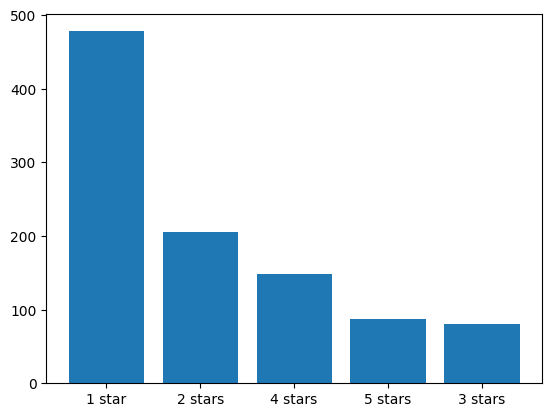

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['label'].value_counts().index,df['label'].value_counts().values)
plt.xlabel('label')
plt.ylabel('Count')
plt.title('distribution of labels')
plt.show()

<Axes: ylabel='Frequency'>

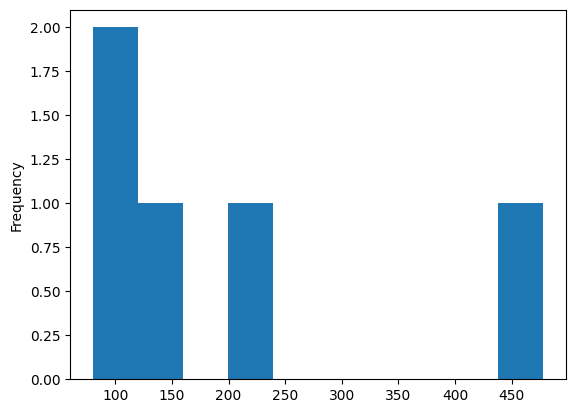

In [ ]:
df['label'].value_counts().plot(kind='hist')

<Axes: ylabel='score'>

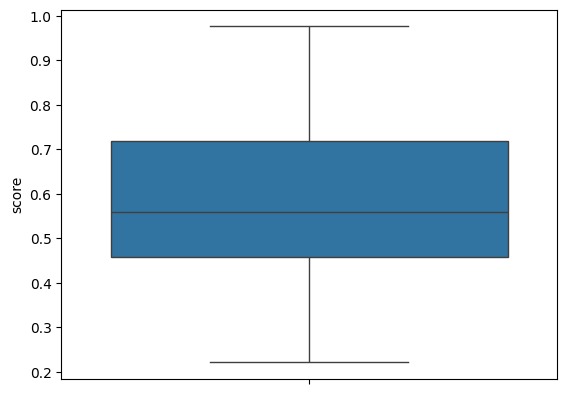

In [ ]:
import seaborn as sns
sns.boxplot(data=df['score'])

<Axes: >

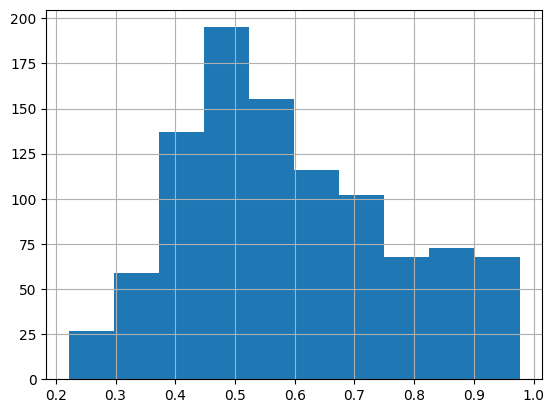

In [ ]:
df.score.hist()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_csv('customer_booking.csv',encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,1
length_of_stay,1
flight_hour,1
flight_day,1
route,1
booking_origin,1
wants_extra_baggage,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
a=['sales_channel','trip_type','flight_day','route','booking_origin']

for i in a:

  target_mean = df.groupby(i)['booking_complete'].mean()

  # Replace categories with the mean target value
  df[i+'_target_enc'] = df[i].map(target_mean)
  df.drop(i,inplace=True,axis=1)

In [ ]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_target_enc,trip_type_target_enc,flight_day_target_enc,route_target_enc,booking_origin_target_enc
0,2,262,19,7,1,0,0,5.52,0,0.15477,0.150575,0.148142,0.000000,0.050279
1,1,112,20,3,0,0,0,5.52,0,0.15477,0.150575,0.148142,0.000000,0.050279
2,2,243,22,17,1,1,0,5.52,0,0.15477,0.150575,0.163148,0.000000,0.103150
3,1,96,31,4,0,0,1,5.52,0,0.15477,0.150575,0.148142,0.000000,0.050279
4,2,68,22,15,1,0,1,5.52,0,0.15477,0.150575,0.163148,0.000000,0.103150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,0.15477,0.150575,0.148142,0.058824,0.050358
49996,1,111,6,4,0,0,0,5.62,0,0.15477,0.150575,0.141440,0.058824,0.050358
49997,1,24,6,22,0,0,1,5.62,0,0.15477,0.150575,0.148142,0.058824,0.050358
49998,1,15,6,11,1,0,1,5.62,0,0.15477,0.150575,0.148605,0.058824,0.050358


In [ ]:
df.drop('route_target_enc',axis=1,inplace=True)

<Figure size 5000x500 with 0 Axes>

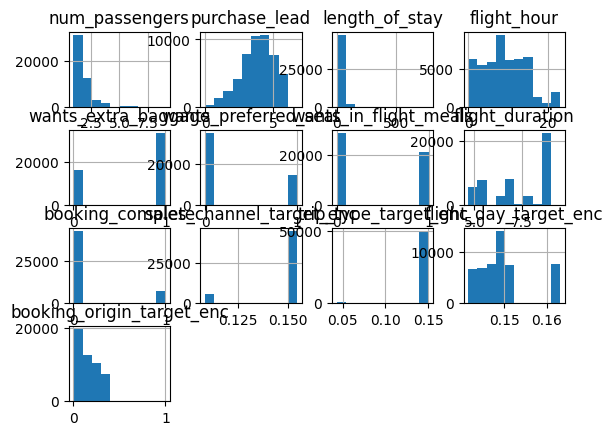

In [ ]:
plt.figure(figsize=(50,5))
df.hist()
plt.show()

In [ ]:
df['purchase_lead'][df.purchase_lead>800]

,purchase_lead
48259,867


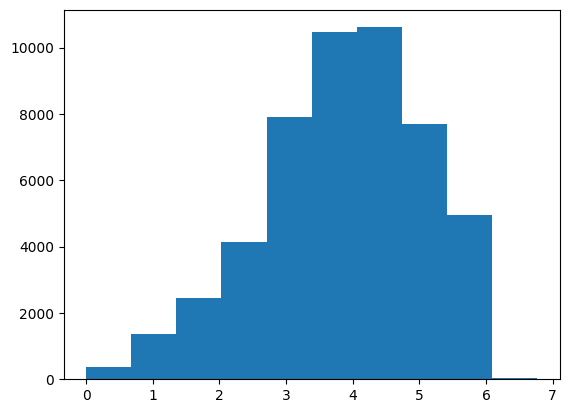

In [ ]:
plt.hist(np.log(df.purchase_lead+1))
plt.show()

In [ ]:
df.purchase_lead=np.log(df.purchase_lead+1)

In [ ]:
df.dropna(inplace=True)

<Figure size 2000x500 with 0 Axes>

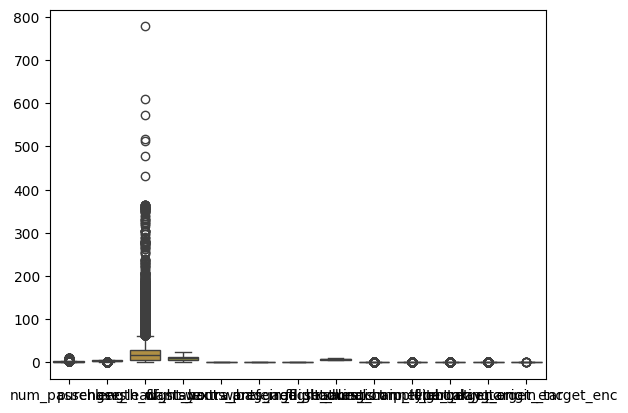

<Figure size 2000x500 with 0 Axes>

In [ ]:
sns.boxplot(data=df.sample(20000))
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

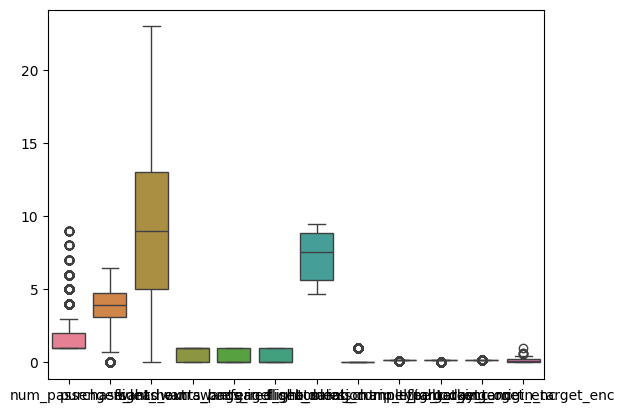

<Figure size 2000x500 with 0 Axes>

In [ ]:
sns.boxplot(data=df.drop('length_of_stay',axis=1).sample(20000))
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

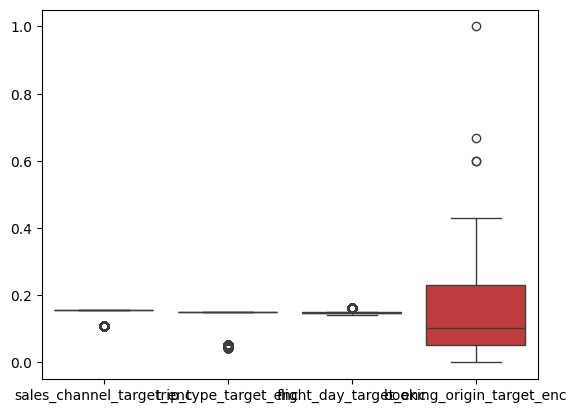

<Figure size 2000x500 with 0 Axes>

In [ ]:
sns.boxplot(data=df.iloc[:,9:].sample(20000))
plt.figure(figsize=(20,5))

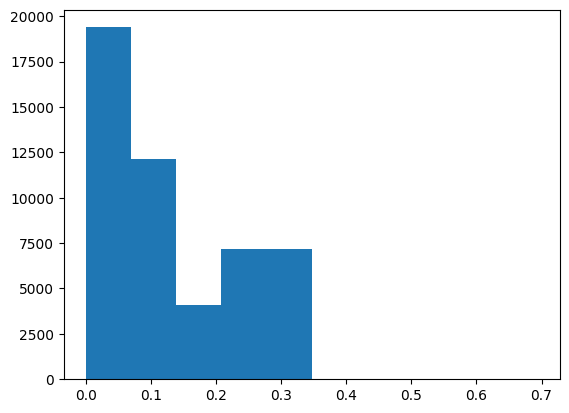

In [ ]:
plt.hist(np.log(df.booking_origin_target_enc+1))
plt.show()

In [ ]:
zscore=(df.booking_origin_target_enc-df.booking_origin_target_enc.mean())/df.booking_origin_target_enc.std()
df=df[(zscore>-3) & (zscore<3)]

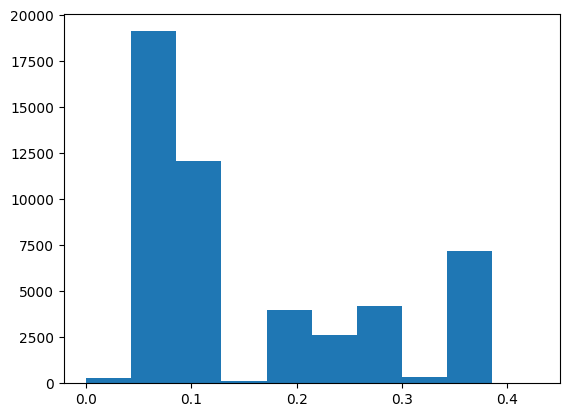

In [ ]:
plt.hist(df.booking_origin_target_enc)
plt.show()

<Figure size 2000x500 with 0 Axes>

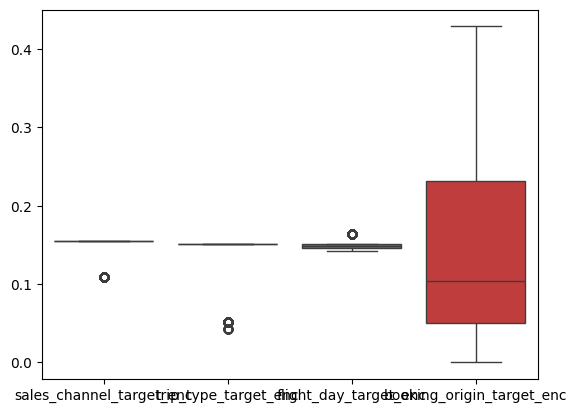

<Figure size 2000x500 with 0 Axes>

In [ ]:
sns.boxplot(data=df.iloc[:,9:].sample(20000))
plt.figure(figsize=(20,5))

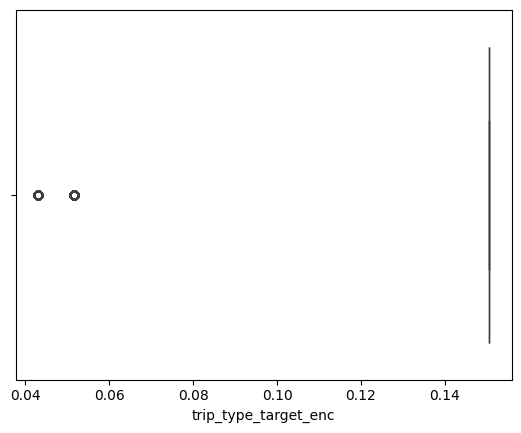

In [ ]:
sns.boxplot(x=df.trip_type_target_enc,data=df.sample(20000))
plt.show()

In [ ]:
q1=df.trip_type_target_enc.quantile(0.25)
q3=df.trip_type_target_enc.quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
zscore=(df.trip_type_target_enc-df.trip_type_target_enc.mean())/df.trip_type_target_enc.std()
df[(zscore<-3) & (zscore>3)]
# df['trip_type_target_enc'][(df.trip_type_target_enc<lower)]

NameError: name 'df' is not defined

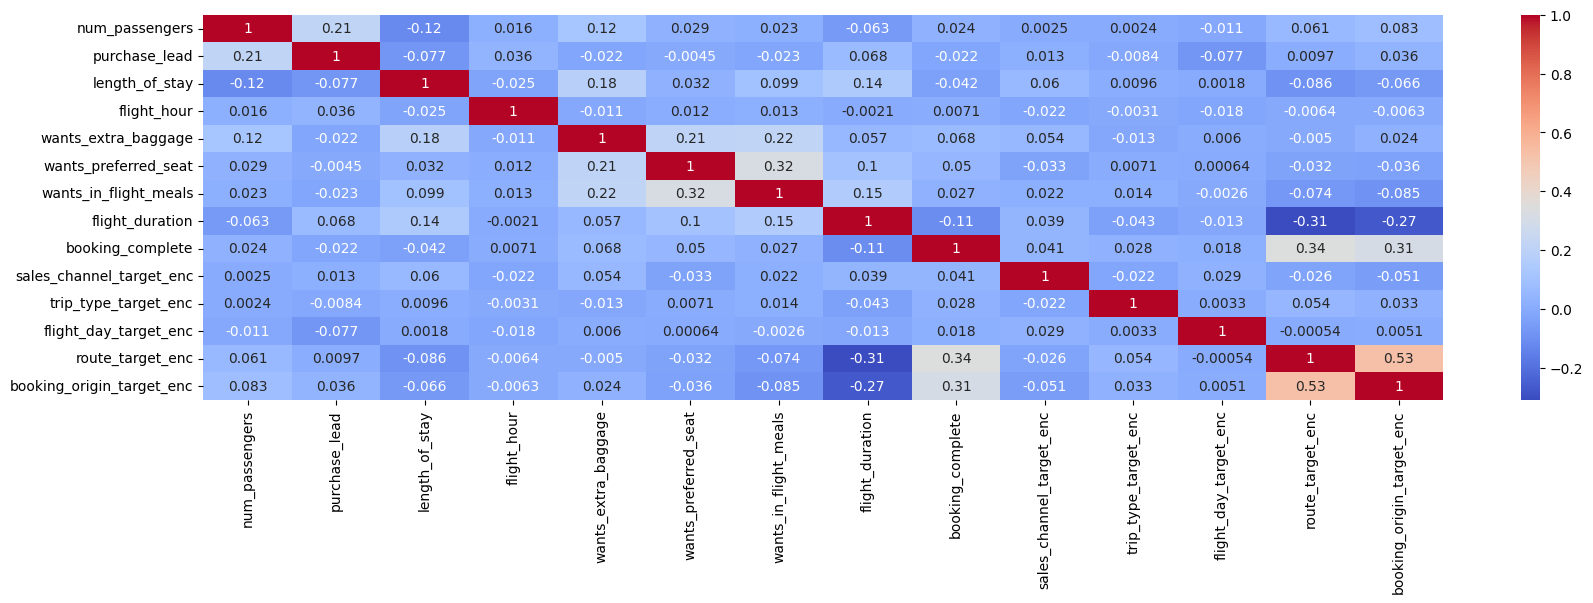

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

In [ ]:
x=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
importances=dict(zip(x.columns,model.feature_importances_))
importances

{'num_passengers': 0.047071046026704734,
 'purchase_lead': 0.18397346541239276,
 'length_of_stay': 0.12098552068486289,
 'flight_hour': 0.13404302823528322,
 'wants_extra_baggage': 0.015334560002598361,
 'wants_preferred_seat': 0.016750176038138144,
 'wants_in_flight_meals': 0.020084549580350573,
 'flight_duration': 0.06540116662777036,
 'sales_channel_target_enc': 0.010889062885476326,
 'trip_type_target_enc': 0.0014655327833624965,
 'flight_day_target_enc': 0.08579359061503601,
 'route_target_enc': 0.19300035662318268,
 'booking_origin_target_enc': 0.10520794448484154}

In [ ]:
df.drop('route_target_enc',axis=1,inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler().fit_transform(x)
pca=PCA(0.95)
x_pca=pca.fit_transform(x_scaled)
pca.n_components_

12

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()

param_grid={
    'n_estimators':[100,200,300],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy', 'log_loss']
}
grid=GridSearchCV(model,param_grid,refit=True,verbose=3,cv=5)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.848 total time=  19.9s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.851 total time=  21.0s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.849 total time=  20.1s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.846 total time=  21.3s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=100;, score=0.852 total time=  20.5s
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.847 total time=  41.2s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.852 total time=  41.7s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.846 total time=  41.1s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=200;, score=0.846 total time=  41.9s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estima

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
crossval=cross_val_score(model,x_train,y_train,cv=kf)
print(crossval)


[0.84325  0.850625 0.842    0.84825  0.850625]


In [ ]:
print(crossval.mean())

0.84695
